In [4]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkodati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Importing input files

dataframe = pd.read_csv('1429_1.csv')

Amz_reviews_dataframe=dataframe[['name','reviews.date','reviews.text']]

Stock_Price=pd.read_csv('StockPrice_Vix_2014_2017.csv')

In [7]:
#Find the total null values in each column
total = Amz_reviews_dataframe.isnull().sum().sort_values(ascending = False)
null_percentage = (Amz_reviews_dataframe.isnull().sum() / Amz_reviews_dataframe.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,name,reviews.date,reviews.text
Total,6760.000000,39.000000,1.000000
Percentage,19.503751,0.112522,0.002885


In [8]:
##remove null values from columns

Amz_reviews_dataframe
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['name'])
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['reviews.date'])
Amz_reviews_dataframe = Amz_reviews_dataframe.dropna(axis=0, subset=['reviews.text'])

In [9]:
#check for cleanliness of data

total = Amz_reviews_dataframe.isnull().sum().sort_values(ascending = False)
null_percentage = (Amz_reviews_dataframe.isnull().sum() / Amz_reviews_dataframe.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,reviews.text,reviews.date,name
Total,0.0,0.0,0.0
Percentage,0.0,0.0,0.0


In [10]:
#extract the date part

Amz_reviews_dataframe['reviews.date']=Amz_reviews_dataframe['reviews.date'].str[0:10]
Amz_reviews_dataframe['reviews.date']=pd.to_datetime(Amz_reviews_dataframe['reviews.date'])

In [11]:
## Change the reviews type to string
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].astype(str)
 
## Lowercase all reviews
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Amz_reviews_dataframe['reviews.text'][2] ## to see the difference

'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

In [12]:
## remove punctuation
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].str.replace('[^\w\s]','')
Amz_reviews_dataframe['reviews.text'][2]

'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

In [13]:
## remove stopwords
stop = stopwords.words('english')
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Amz_reviews_dataframe['reviews.text'][2]

'inexpensive tablet use learn step nabi thrilled learn skype already'

In [14]:
##stemming
st = PorterStemmer()
Amz_reviews_dataframe['reviews.text'] = Amz_reviews_dataframe['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Amz_reviews_dataframe['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [15]:
#functions to calculate sentiment of comments on each record

analyzer=SentimentIntensityAnalyzer()

def sentiment_score(x):
    return analyzer.polarity_scores(x)   

def sentiment(x):
    
    lists = list(x.split(" "))  
    count_pos=0
    count_neg=0
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] >= 0.05: 
            count_pos+=1
        elif scores['compound'] <= - 0.05: 
            count_neg+=1
    if count_pos>count_neg:
        return 1
    elif count_neg>count_pos:
        return 0
    else:
        return 0.5
    
def blob_sentiment(x):
    
    blob=TextBlob(x.strip('\n'))
    if blob.sentiment.polarity>0: 
        return 1
    elif blob.sentiment.polarity<=0:
        return 0
    
Amz_reviews_dataframe['sentiment_score'] = Amz_reviews_dataframe['reviews.text'].apply(sentiment_score)
Amz_reviews_dataframe['sentiment'] = Amz_reviews_dataframe['reviews.text'].apply(sentiment)
Amz_reviews_dataframe['blob_sentiment'] = Amz_reviews_dataframe['reviews.text'].apply(blob_sentiment)

In [16]:
Amz_reviews_dataframe

,name,reviews.date,reviews.text,sentiment_score,sentiment,blob_sentiment
0,All-New Fire HD 8 Tablet,2017-01-13,product far disappoint children love use like ...,"{'neg': 0.139, 'neu': 0.515, 'pos': 0.345, 'co...",1.0,1
1,All-New Fire HD 8 Tablet,2017-01-13,great beginn experienc person bought gift love,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",1.0,1
2,All-New Fire HD 8 Tablet,2017-01-13,inexpens tablet use learn step nabi thrill lea...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",1.0,0
3,All-New Fire HD 8 Tablet,2017-01-13,ive fire hd 8 two week love tablet great value...,"{'neg': 0.058, 'neu': 0.565, 'pos': 0.377, 'co...",1.0,1
4,All-New Fire HD 8 Tablet,2017-01-12,bought grand daughter come visit set user ente...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",1.0,1
...,...,...,...,...,...,...
27895,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,2016-08-16,new favorit devic perfect lot un useon featur ...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",1.0,1
27896,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,2016-08-16,got basic experi straight box realli impress n...,"{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...",1.0,1
27897,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,2016-08-15,good product basic bad buy specif light contro...,"{'neg': 0.121, 'neu': 0.718, 'pos': 0.161, 'co...",1.0,1
27898,New Amazon Kindle Fire Hd 9w Powerfast Adapter...,2016-08-14,great connect home peopl use buy plan make eve...,"{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...",1.0,1


In [17]:
#combining the comments on a same day as 1

agg1=pd.DataFrame()
agg1['reviews.date']=Amz_reviews_dataframe['reviews.date']
agg1['reviews.text'] = Amz_reviews_dataframe[['reviews.date','reviews.text']].groupby(['reviews.date'])['reviews.text'].transform(lambda x: ','.join(x))
agg1=agg1[['reviews.text','reviews.date']].drop_duplicates()


In [34]:
#functions to calculate positive and negative word count percentage of combined comments in a day
analyzer=SentimentIntensityAnalyzer()
positive_words_list=[]
negative_words_list=[]
def positive_words(x):      
    lists = list(x.split(" "))  
    count_pos=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] >= 0.05: 
            count_pos+=1
            positive_words_list.append(i)
    return count_pos/total

def negative_words(x):      
    lists = list(x.split(" "))  
    count_neg=0
    total=len(lists)
    
    for i in lists:
        scores=analyzer.polarity_scores(i)
        if scores['compound'] < 0.05: 
            count_neg+=1
            negative_words_list.append(i)
    return count_neg/total

    
agg1['% positive words'] = Amz_reviews_dataframe['reviews.text'].apply(positive_words)
agg1['% negative words'] = Amz_reviews_dataframe['reviews.text'].apply(negative_words)

In [44]:
unique_positive_words_list=set(positive_words_list)
unique_positive_words_list=list(unique_positive_words_list)

In [47]:
unique_negative_words_list=set(negative_words_list)
unique_negative_words_list=list(unique_negative_words_list)

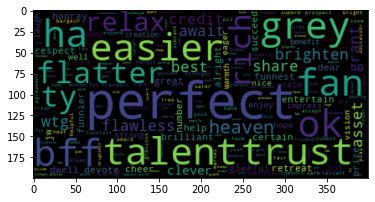

In [45]:
wordcloud = WordCloud(max_font_size=60).generate(' '.join(unique_positive_words_list[:]))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

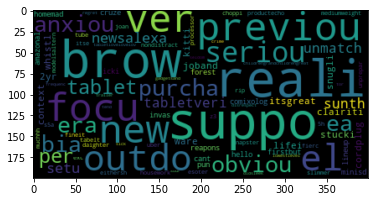

In [48]:
wordcloud = WordCloud(max_font_size=60).generate(' '.join(unique_negative_words_list[:]))
plt.imshow(wordcloud,interpolation="bilinear")
plt.show()

In [20]:
#Formatting the Date column
Stock_Price['Date']=pd.to_datetime(Stock_Price['Date'])
Stock_Price

,Date,Stock Adj Close,VIX Close
0,2014-01-02,397.970001,14.23
1,2014-01-03,396.440002,13.76
2,2014-01-06,393.630005,13.55
3,2014-01-07,398.029999,12.92
4,2014-01-08,401.920013,12.87
...,...,...,...
1253,2018-12-24,1343.960000,36.07
1254,2018-12-26,1470.900000,30.41
1255,2018-12-27,1461.640000,29.96
1256,2018-12-28,1478.020000,28.34


In [21]:
dataset_v2=pd.merge(left=agg1,right=Stock_Price, left_on='reviews.date', right_on='Date')
dataset_v2

,reviews.text,reviews.date,% positive words,% negative words,Date,Stock Adj Close,VIX Close
0,product far disappoint children love use like ...,2017-01-13,0.153846,0.846154,2017-01-13,817.14,11.23
1,bought grand daughter come visit set user ente...,2017-01-12,0.096154,0.903846,2017-01-12,813.64,11.54
2,great devic read book like link borrow librari...,2017-01-23,0.111111,0.888889,2017-01-23,817.88,11.77
3,nice reader almost perfect wantne good bargain...,2017-01-24,0.571429,0.428571,2017-01-24,822.44,11.07
4,great size easi carri travel need spend time l...,2017-01-27,0.055556,0.944444,2017-01-27,835.77,10.58
...,...,...,...,...,...,...,...
683,great starter tablet kid adult alik alway grea...,2017-06-28,0.181818,0.818182,2017-06-28,990.33,10.03
684,love big reader enjoy fire beacus get read sur...,2017-07-05,0.166667,0.833333,2017-07-05,971.40,11.07
685,speaker microphon work great work great samsun...,2017-08-10,0.137931,0.862069,2017-08-10,956.92,16.04
686,pleas echo alexa use util chang temp via nest ...,2017-09-05,0.076923,0.923077,2017-09-05,965.27,12.23


In [22]:
final_dataset=dataset_v2[['Date',"% positive words","Stock Adj Close","VIX Close"]]
final_dataset

,Date,% positive words,Stock Adj Close,VIX Close
0,2017-01-13,0.153846,817.14,11.23
1,2017-01-12,0.096154,813.64,11.54
2,2017-01-23,0.111111,817.88,11.77
3,2017-01-24,0.571429,822.44,11.07
4,2017-01-27,0.055556,835.77,10.58
...,...,...,...,...
683,2017-06-28,0.181818,990.33,10.03
684,2017-07-05,0.166667,971.40,11.07
685,2017-08-10,0.137931,956.92,16.04
686,2017-09-05,0.076923,965.27,12.23


In [23]:
final_dataset.corr()

,% positive words,Stock Adj Close,VIX Close
% positive words,1.000000,0.182569,-0.117514
Stock Adj Close,0.182569,1.000000,-0.557942
VIX Close,-0.117514,-0.557942,1.000000


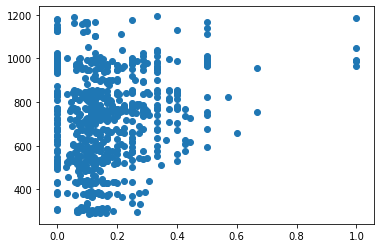

In [21]:
plt.scatter(final_dataset['% positive words'],final_dataset['Stock Adj Close'])

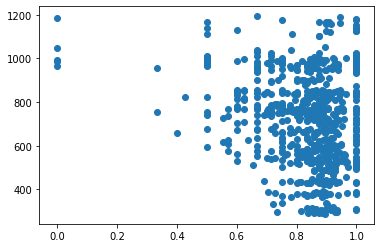

In [22]:
plt.scatter(final_dataset['% negative words'],final_dataset['Stock Adj Close'])

In [23]:
final_dataset.to_csv("final_dataset.csv")

## Forecasting Stock Price using Linear regression 

In [24]:
# Creating a copy of final dataframe, adding previous and 2nd previous stock price values to dataframe

test=final_dataset
test['Previous Month SP']=test['Stock Adj Close'].shift()
test['2nd Previous Month SP']=test['Stock Adj Close'].shift(2)
test['Previous Month SP']= test['Previous Month SP'].replace(np.NaN,0)
test['2nd Previous Month SP']=test['2nd Previous Month SP'].replace(np.NaN,0)
test

C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Date,% positive words,Stock Adj Close,VIX Close,Previous Month SP,2nd Previous Month SP
0,2017-01-13,0.153846,817.14,11.23,0.000000,0.000000
1,2017-01-12,0.096154,813.64,11.54,817.140000,0.000000
2,2017-01-23,0.111111,817.88,11.77,813.640000,817.140000
3,2017-01-24,0.571429,822.44,11.07,817.880000,813.640000
4,2017-01-27,0.055556,835.77,10.58,822.440000,817.880000
...,...,...,...,...,...,...
683,2017-06-28,0.181818,990.33,10.03,437.390015,488.100006
684,2017-07-05,0.166667,971.40,11.07,990.330000,437.390015
685,2017-08-10,0.137931,956.92,16.04,971.400000,990.330000
686,2017-09-05,0.076923,965.27,12.23,956.920000,971.400000


In [25]:
#setting index as date values
test.index = test['Date']

#sorting
data = test.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=data.index,columns=['VIX Close','Previous Month SP',
                                                         '2nd Previous Month SP','Stock Adj Close'])

for i in range(0,len(data)):
   new_data['Stock Adj Close'][i] = data['Stock Adj Close'][i]
   new_data['% positive words'][i] = data['% positive words'][i]
   new_data['VIX Close'][i] = data['VIX Close'][i]
   new_data['Previous Month SP'][i] = data['Previous Month SP'][i]
   new_data['2nd Previous Month SP'][i] = data['2nd Previous Month SP'][i]

# Seggregating date field as timestamp values are not accepted by the model

new_data['Year']=pd.DatetimeIndex(data['Date']).year
new_data['Month']=pd.DatetimeIndex(data['Date']).month
new_data['Day']=pd.DatetimeIndex(data['Date']).day

In [26]:
#split into train and validation
train = new_data[:500]
valid = new_data[500:]

x_train = train.drop('Stock Adj Close', axis=1)
y_train = train['Stock Adj Close']
x_valid = valid.drop('Stock Adj Close', axis=1)
y_valid = valid['Stock Adj Close']

In [31]:
new_data.head()

,% positive words,VIX Close,Previous Month SP,2nd Previous Month SP,Stock Adj Close,Year,Month,Day
Date,,,,,,,,
2014-04-03,0.0993789,13.37,387.83,383.54,333.62,2014,4,3
2014-04-07,0.0795455,15.57,333.62,387.83,317.76,2014,4,7
2014-05-02,0.1,12.91,310.05,296.93,308.01,2014,5,2
2014-05-05,0.142857,13.29,296.93,712.24,310.05,2014,5,5
2014-05-06,0.0659341,13.8,308.01,310.05,297.38,2014,5,6


In [32]:
x_train.head()

,% positive words,VIX Close,Previous Month SP,2nd Previous Month SP,Year,Month,Day
Date,,,,,,,
2014-04-03,0.0993789,13.37,387.83,383.54,2014,4,3
2014-04-07,0.0795455,15.57,333.62,387.83,2014,4,7
2014-05-02,0.1,12.91,310.05,296.93,2014,5,2
2014-05-05,0.142857,13.29,296.93,712.24,2014,5,5
2014-05-06,0.0659341,13.8,308.01,310.05,2014,5,6


In [27]:
#implement linear regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

model.summary()

In [29]:
print(model.score(x_train,y_train))

print(model.coef_)

print(model.intercept_)


0.941408545560231
[-2.33963430e+00 -1.35473724e+00  2.45646053e-01  3.13173578e-03
  1.73461441e+02  1.89927637e+01  4.96586516e-01]
-349279.3385012643


In [28]:
#make predictions
y_pred = model.predict(x_valid)

In [29]:
#evaluating model performance

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(y_pred)),2)))
print("Root Mean Square Error",rms)
mse=mean_squared_error(y_valid, y_pred, multioutput='raw_values')
print("Mean Squared Error: ",mse[0])

Root Mean Square Error 52.20941291189253
Mean Squared Error:  2725.8227966044888


Rsquare:
R2 score= 1 — (Error from Linear Regression Model/Simple average model).
Best possible score is 1.0 and it can be negative 

In [30]:
r2=r2_score(y_valid, y_pred, multioutput='variance_weighted')
print("Rsquare value: ",r2)

Rsquare value:  0.6026868641803811


C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vkodati\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: F

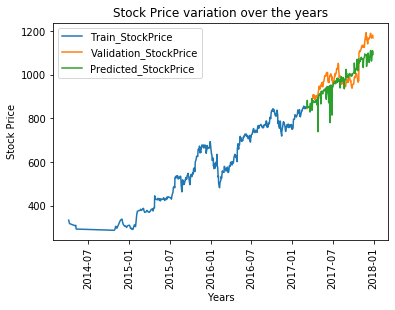

In [31]:
#plotting the results

valid['Predictions'] = 0
valid['Predictions'] = y_pred

valid.index = new_data[500:].index
train.index = new_data[:500].index

Train_StockPrice=train['Stock Adj Close']
Validation_StockPrice=valid['Stock Adj Close']
Predicted_StockPrice=valid['Predictions']

plt.plot(Train_StockPrice)
plt.plot(Validation_StockPrice)
plt.plot(Predicted_StockPrice)

plt.xticks(rotation=90)
plt.legend(['Train_StockPrice','Validation_StockPrice','Predicted_StockPrice'], loc='upper left')
plt.xlabel('Years')
plt.ylabel('Stock Price')
plt.title('Stock Price variation over the years')
plt.show()
